<a href="https://colab.research.google.com/github/vvsrupesh/Colab-Notebooks/blob/main/FunctionTransformer_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer



In [ ]:
df = pd.read_csv('/content/train (1).csv',usecols=['Age','Survived','Fare'])

In [ ]:
df.isnull().sum()

,0
Survived,0
Age,177
Fare,0


In [ ]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

<ipython-input-34-7ee7fe972bc2>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


In [ ]:
df.isnull().sum()

,0
Survived,0
Age,0
Fare,0


In [ ]:
X=df.drop('Survived',axis=1)
y=df['Survived']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<ipython-input-38-1a0911892c27>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


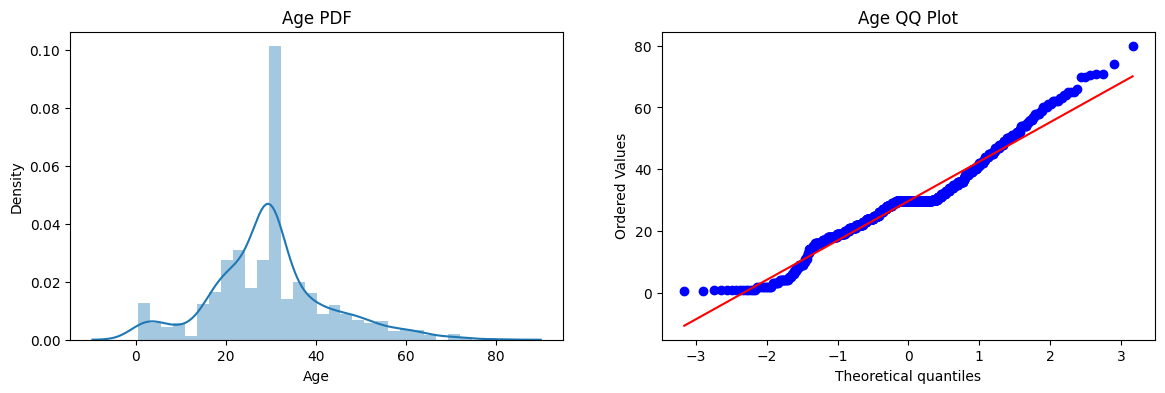

In [ ]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(df['Age'])
plt.title('Age PDF')


plt.subplot(122)
stats.probplot(df['Age'],dist='norm',plot=plt)
plt.title('Age QQ Plot')
plt.show()

<ipython-input-39-be6994f6ef1f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fare'])


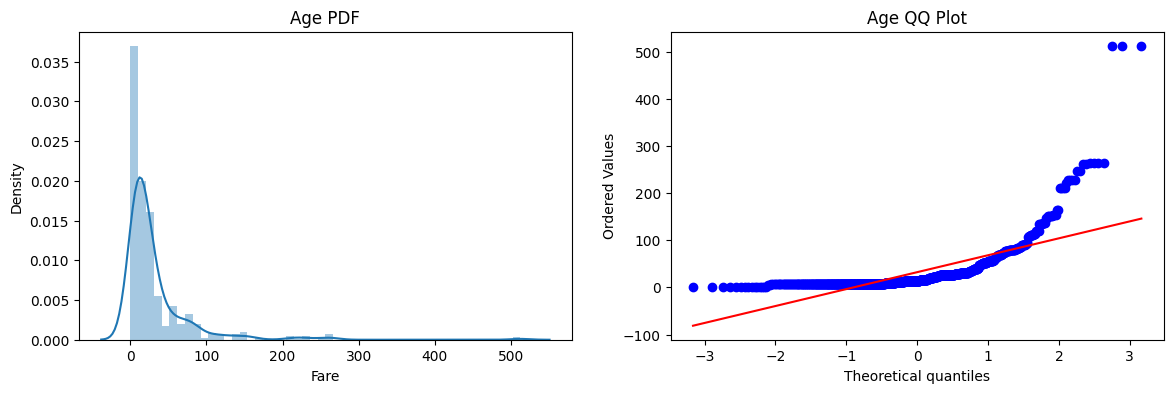

In [ ]:
 plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(df['Fare'])
plt.title('Age PDF')


plt.subplot(122)
stats.probplot(df['Fare'],dist='norm',plot=plt)
plt.title('Age QQ Plot')
plt.show()

In [ ]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()


In [ ]:
clf.fit(X_train, y_train)
clf2.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred1 = clf2.predict(X_test)
print("Accuracy LR ",accuracy_score(y_test, y_pred))
print("Accuracy DT ",accuracy_score(y_test, y_pred1))

Accuracy LR  0.6480446927374302
Accuracy DT  0.6703910614525139


In [ ]:
trf = FunctionTransformer(func= np.log1p)

In [ ]:
X_train_trans = trf.fit_transform(X_train)
X_test_trans = trf.fit_transform(X_test)

In [ ]:




clf = LogisticRegression()
clf2 = DecisionTreeClassifier()
clf.fit(X_train_trans, y_train)
clf2.fit(X_train_trans, y_train)


y_pred = clf.predict(X_test_trans)
y_pred1 = clf2.predict(X_test_trans)
print("Accuracy LR ",accuracy_score(y_test, y_pred))
print("Accuracy DT ",accuracy_score(y_test, y_pred1))





Accuracy LR  0.6815642458100558
Accuracy DT  0.6815642458100558


In [ ]:
X_trans = trf.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf, X_trans, y, cv=5, scoring='accuracy').mean()))
print("DT",np.mean(cross_val_score(clf2, X_trans, y, cv=5, scoring='accuracy').mean()))


LR 0.6780114242671521
DT 0.6442282342602473


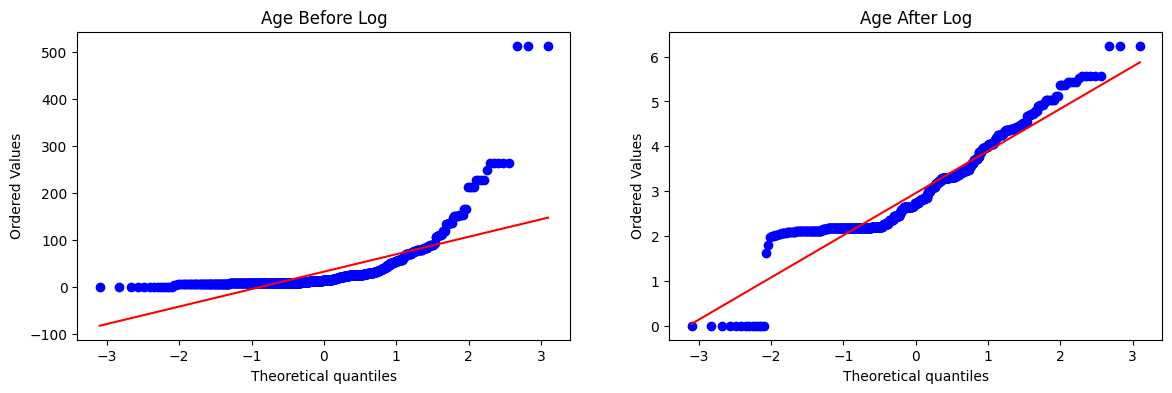

In [ ]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Fare'],dist='norm',plot=plt)
plt.title('Fare Before Log')


plt.subplot(122)
stats.probplot(X_train_trans['Fare'],dist='norm',plot=plt)
plt.title('Fare After Log')
plt.show()

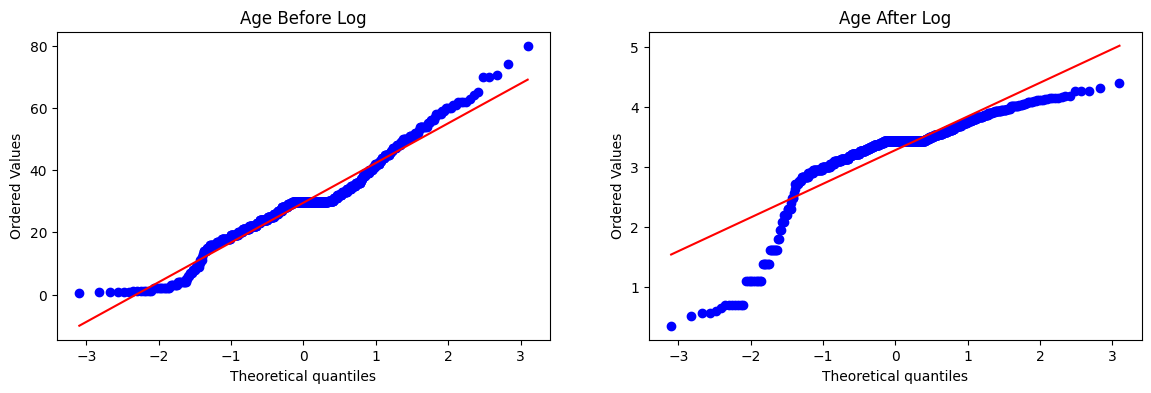

In [ ]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Age'],dist='norm',plot=plt)
plt.title('Age Before Log')


plt.subplot(122)
stats.probplot(X_train_trans['Age'],dist='norm',plot=plt)
plt.title('Age After Log')
plt.show()

In [ ]:
trf2 = ColumnTransformer([
    ('log',FunctionTransformer(np.log1p),['Fare'])
],remainder='passthrough')

X_train_trans2 = trf2.fit_transform(X_train)
X_test_trans2 = trf2.fit_transform(X_test)

In [ ]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_trans2, y_train)
clf2.fit(X_train_trans2, y_train)

y_pred = clf.predict(X_test_trans2)
y_pred1 = clf2.predict(X_test_trans2)

print("Accuracy LR ",accuracy_score(y_test, y_pred))
print("Accuracy DT ",accuracy_score(y_test, y_pred1))

Accuracy LR  0.6703910614525139
Accuracy DT  0.6815642458100558


In [ ]:
X_trans2 = trf2.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf, X_trans, y, cv=5, scoring='accuracy').mean()))
print("DT",np.mean(cross_val_score(clf2, X_trans, y, cv=5, scoring='accuracy').mean()))


LR 0.6780114242671521
DT 0.6464628711317557


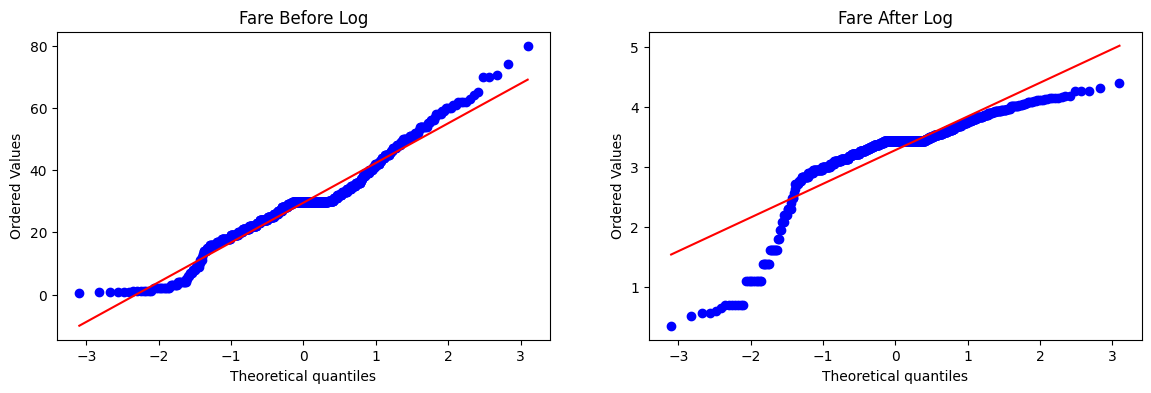

In [ ]:
def apply_transformer():
  X = df.drop('Survived',axis=1)
  y = df['Survived']

  trf = ColumnTransformer([
    ('log',FunctionTransformer(np.log1p),['Fare'])
  ],remainder='passthrough')

  X_trans = trf.fit_transform(X)

  clf = LogisticRegression()


  print("LR",np.mean(cross_val_score(clf, X_trans, y, cv=10, scoring='accuracy')))



plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Age'],dist='norm',plot=plt)
plt.title('Fare Before Log')


plt.subplot(122)
stats.probplot(X_train_trans['Age'],dist='norm',plot=plt)
plt.title('Fare After Log')
plt.show()



In [ ]:
apply_transformer(lambda x: x**2)

TypeError: apply_transformer() takes 0 positional arguments but 1 was given

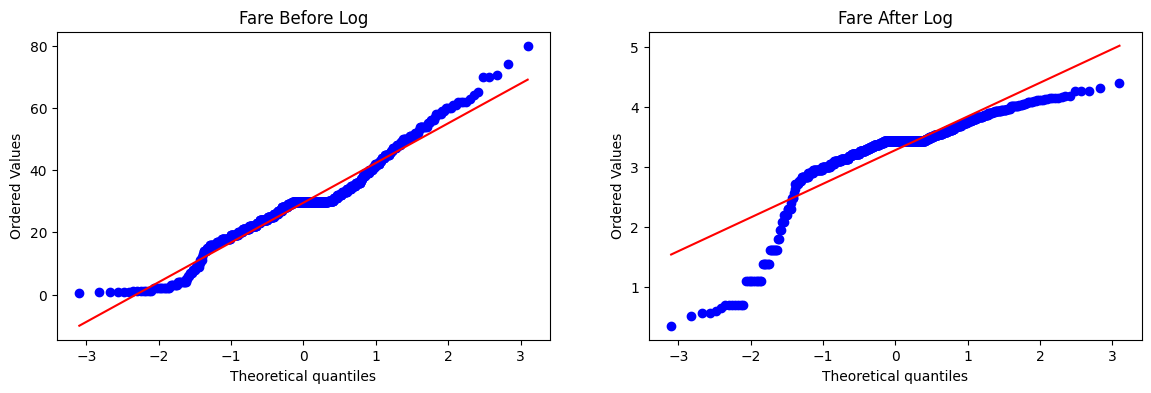

In [ ]:
def apply_transformer(transform):
  X = df.drop('Survived',axis=1)
  y = df['Survived']

  trf = ColumnTransformer([
    ('log',FunctionTransformer(np.log1p),['Fare'])
  ],remainder='passthrough')

  X_trans = trf.fit_transform(X)

  clf = LogisticRegression()


  print("LR",np.mean(cross_val_score(clf, X_trans, y, cv=10, scoring='accuracy')))



plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Age'],dist='norm',plot=plt)
plt.title('Fare Before Log')


plt.subplot(122)
stats.probplot(X_train_trans['Age'],dist='norm',plot=plt)
plt.title('Fare After Log')
plt.show()



In [ ]:
apply_transformer(lambda x: x)

LR 0.6712609238451936


In [ ]:
apply_transformer(lambda x: x**2)

LR 0.6712609238451936


In [ ]:
apply_transformer(lambda x: x*1/2)

LR 0.6712609238451936
